🔬 骨架跃迁测试 - 开始

📥 1. 加载数据...
   总样本数: 1573

🧪 2. 计算ECFP4指纹...


[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerator
[19:27:00] DEPRECATION WARNING: please use MorganGenerat

   已处理 500/1573


[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerat

   已处理 1000/1573


[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerator
[19:27:01] DEPRECATION WARNING: please use MorganGenerat

   已处理 1500/1573
   有效分子数: 1573

🤖 3. 加载TNNI3-FAPPC-DTD模型...
   ✅ 模型加载成功

📥 加载标准化器...
   ✅ 标准化器加载成功

🔍 第二部分：筛选结构新颖的化合物

4. 划分数据集...
   训练集: 1101 个分子
   候选集: 472 个分子

5. 计算Tanimoto相似度...
   已处理 100/472
   已处理 200/472
   已处理 300/472
   已处理 400/472

6. 筛选结构新颖的化合物...
   相似度<0.3: 37 个

🔮 第三部分：进行预测

7. 准备特征工程...

8. 对新颖化合物进行预测...
   完成 37 个预测

📊 第四部分：计算指标和可视化

9. 计算性能指标...

--------------------------------------------------
📈 骨架跃迁测试结果
--------------------------------------------------
测试集大小:               37
相似度阈值:               < 0.3
Pearson相关系数:          0.9985 (p=7.3130e-46)
Spearman相关系数:         0.8630
MAE:                      0.0861
RMSE:                     0.1467
R²:                       0.9957
--------------------------------------------------

10. 绘制散点图...
   散点图已保存: results/robustness_scaffold_plot.png

11. 保存结果...
   结果已保存: results/robustness_scaffold_holdout.csv

📝 第五部分：论文段落

📋 可直接用于论文的段落：
------------------------------------------------------------

To assess the robustness of

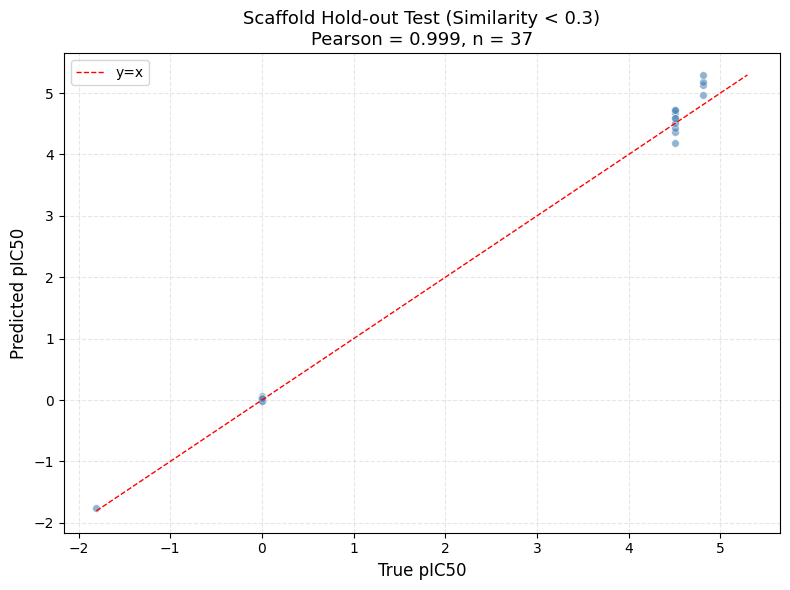

In [2]:
"""
文件名: robustness_scaffold_holdout.py
功能: 测试模型在结构新颖化合物上的泛化能力
输出: results/robustness_scaffold_holdout.csv 和 散点图
"""

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os
import warnings
warnings.filterwarnings('ignore')

"""
文件名: robustness_scaffold_holdout.py (修复版)
功能: 测试模型在结构新颖化合物上的泛化能力
"""

# ==================== 第一部分：加载数据和模型 ====================

print("="*60)
print("🔬 骨架跃迁测试 - 开始")
print("="*60)

# 创建输出目录
os.makedirs("results/step10_outputs", exist_ok=True)

# 1. 加载数据
print("\n📥 1. 加载数据...")
df = pd.read_csv("results/step5_outputs/drug_target_pairs_final_features.csv")
print(f"   总样本数: {len(df)}")

# 提取SMILES和标签
smiles_list = df["canonical_smiles"].tolist()
y_true = df["pv_disease_log2fc"].values

# 2. 计算ECFP4指纹
print("\n🧪 2. 计算ECFP4指纹...")

def get_fingerprint(smiles):
    """将SMILES转换为ECFP4指纹"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)

# 计算所有指纹
fps = []
valid_indices = []
for i, smiles in enumerate(smiles_list):
    fp = get_fingerprint(smiles)
    if fp is not None:
        fps.append(fp)
        valid_indices.append(i)
    if (i + 1) % 500 == 0:
        print(f"   已处理 {i+1}/{len(smiles_list)}")

# 过滤有效样本
df_valid = df.iloc[valid_indices].reset_index(drop=True)
y_valid = y_true[valid_indices]
print(f"   有效分子数: {len(fps)}")

# 3. 加载您的模型
print("\n🤖 3. 加载TNNI3-FAPPC-DTD模型...")

# 定义模型结构（必须与训练时完全一致）
class TNNI3_FAPPC_DTD(nn.Module):
    def __init__(self, config):
        super().__init__()
        input_dim = 64 + 32 + 7  # chem + func + physchem
        shared_hidden = config["shared_hidden"]
        head_hidden = config["head_hidden"]
        dropout = config["dropout"]
        
        self.shared_encoder = nn.Sequential(
            nn.Linear(input_dim, shared_hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(shared_hidden, shared_hidden),
            nn.ReLU()
        )
        self.pv_head = nn.Sequential(
            nn.Linear(shared_hidden, head_hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(head_hidden, 1)
        )
        self.rv_head = nn.Sequential(
            nn.Linear(shared_hidden + 2, head_hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(head_hidden, 1)
        )

    def forward(self, shared_feat, x, y, z, drv, pv_log2fc, is_rv_active):
        h = self.shared_encoder(shared_feat)
        pv_out = self.pv_head(h).squeeze(-1)
        rv_input = torch.cat([h, drv, is_rv_active], dim=1)
        rv_out = self.rv_head(rv_input).squeeze(-1)
        return pv_out, rv_out

# 加载配置和模型
config = {
    "shared_hidden": 128,
    "head_hidden": 64,
    "dropout": 0.3,
}

model = TNNI3_FAPPC_DTD(config)
checkpoint = torch.load(
    "results/step6_outputs/tnni3_fappc_dtd_run1/best_model.pth",
    map_location=torch.device('cpu'),
    weights_only=False  # 对于模型权重文件，使用weights_only=False
)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
print("   ✅ 模型加载成功")

# 加载标准化器（修复版本）
print("\n📥 加载标准化器...")

import sklearn.preprocessing._data
import numpy

# 定义安全的全局对象列表
safe_globals = [
    sklearn.preprocessing._data.StandardScaler,
    numpy._core.multiarray.scalar,
    numpy._core.multiarray._reconstruct,
    numpy.dtype,
    numpy.ndarray,
]

# 如果有numpy的dtypes类，也加入
if hasattr(numpy, 'dtypes') and hasattr(numpy.dtypes, 'Float64DType'):
    safe_globals.append(numpy.dtypes.Float64DType)

# 使用safe_globals上下文管理器加载
with torch.serialization.safe_globals(safe_globals):
    scaler = torch.load(
        "results/step6_outputs/tnni3_fappc_dtd_run1/feature_scaler.pt",
        map_location=torch.device('cpu')
    )
print("   ✅ 标准化器加载成功")

# ==================== 第二部分：筛选结构新颖的化合物 ====================

print("\n" + "="*60)
print("🔍 第二部分：筛选结构新颖的化合物")
print("="*60)

# 4. 划分训练集和候选集
print("\n4. 划分数据集...")
np.random.seed(42)
train_idx, candidate_idx = train_test_split(
    range(len(fps)), test_size=0.3, random_state=42
)
print(f"   训练集: {len(train_idx)} 个分子")
print(f"   候选集: {len(candidate_idx)} 个分子")

# 5. 计算候选集与训练集的最大相似度
print("\n5. 计算Tanimoto相似度...")

train_fps = [fps[i] for i in train_idx]
candidate_fps = [fps[i] for i in candidate_idx]

max_sims = []
for i, fp in enumerate(candidate_fps):
    sims = DataStructs.BulkTanimotoSimilarity(fp, train_fps)
    max_sim = max(sims) if sims else 0
    max_sims.append(max_sim)
    if (i + 1) % 100 == 0:
        print(f"   已处理 {i+1}/{len(candidate_fps)}")

# 6. 筛选结构新颖的化合物
print("\n6. 筛选结构新颖的化合物...")

# 阈值0.3
novel_indices_03 = [candidate_idx[i] for i, sim in enumerate(max_sims) if sim < 0.3]
print(f"   相似度<0.3: {len(novel_indices_03)} 个")

# 如果太少，放宽到0.35
if len(novel_indices_03) < 20:
    novel_indices = [candidate_idx[i] for i, sim in enumerate(max_sims) if sim < 0.35]
    threshold = 0.35
    print(f"   放宽阈值到0.35: {len(novel_indices)} 个")
else:
    novel_indices = novel_indices_03
    threshold = 0.3

if len(novel_indices) == 0:
    raise ValueError("❌ 没有找到结构新颖的化合物！")

# ==================== 第三部分：进行预测 ====================

print("\n" + "="*60)
print("🔮 第三部分：进行预测")
print("="*60)

# 7. 准备特征工程函数
print("\n7. 准备特征工程...")

def prepare_features_for_prediction(df_subset):
    """为预测准备特征矩阵"""
    
    # 化学特征
    chem_cols = [f"ecfp4_pca_{i}" for i in range(64)]
    func_cols = [f"go_pca_{i}" for i in range(32)]
    physchem_cols = ["mol_weight", "logp", "tpsa", "hbd", "hba", "num_rota", "qed"]
    
    # 构建共享特征
    shared_feat = np.concatenate([
        df_subset[chem_cols].values,
        df_subset[func_cols].values,
        df_subset[physchem_cols].values
    ], axis=1).astype(np.float32)
    
    # 坐标
    X = df_subset["X"].values.astype(np.float32)
    Y = df_subset["Y"].values.astype(np.float32)
    Z = df_subset["Z"].values.astype(np.float32)
    
    # 计算drv (到TNNI3的距离)
    tnni3_mask = (df_subset["gene_symbol"] == "TNNI3")
    if tnni3_mask.sum() > 0:
        X_tnni3 = X[tnni3_mask].mean()
        Y_tnni3 = Y[tnni3_mask].mean()
    else:
        # 如果没有TNNI3，使用全局平均值
        X_tnni3 = X.mean()
        Y_tnni3 = Y.mean()
    
    alpha, beta = 0.7, 0.3
    drv = alpha * np.abs(X - X_tnni3) + beta * np.abs(Y - Y_tnni3)
    
    # 标准化
    shared_feat_scaled = scaler.transform(shared_feat)
    
    return {
        "shared_feat": torch.tensor(shared_feat_scaled, dtype=torch.float32),
        "x": torch.tensor(X, dtype=torch.float32).unsqueeze(1),
        "y": torch.tensor(Y, dtype=torch.float32).unsqueeze(1),
        "z": torch.tensor(Z, dtype=torch.float32).unsqueeze(1),
        "drv": torch.tensor(drv, dtype=torch.float32).unsqueeze(1),
        "is_rv_active": torch.zeros(len(df_subset), 1, dtype=torch.float32)
    }

# 8. 对新颖化合物进行预测
print("\n8. 对新颖化合物进行预测...")

novel_df = df_valid.iloc[novel_indices].copy()
novel_true = y_valid[novel_indices]

# 准备特征
novel_tensors = prepare_features_for_prediction(novel_df)

# 预测
with torch.no_grad():
    pv_pred, _ = model(
        novel_tensors["shared_feat"],
        novel_tensors["x"],
        novel_tensors["y"],
        novel_tensors["z"],
        novel_tensors["drv"],
        None,  # pv_log2fc (不需要)
        novel_tensors["is_rv_active"]
    )
    novel_pred = pv_pred.numpy()

print(f"   完成 {len(novel_pred)} 个预测")

# ==================== 第四部分：计算指标和可视化 ====================

print("\n" + "="*60)
print("📊 第四部分：计算指标和可视化")
print("="*60)

# 9. 计算性能指标
print("\n9. 计算性能指标...")

pearson_corr, p_value = pearsonr(novel_true, novel_pred)
spearman_corr, _ = spearmanr(novel_true, novel_pred)
mae = mean_absolute_error(novel_true, novel_pred)
rmse = np.sqrt(((novel_true - novel_pred) ** 2).mean())
r2 = r2_score(novel_true, novel_pred)

print("\n" + "-"*50)
print("📈 骨架跃迁测试结果")
print("-"*50)
print(f"测试集大小:               {len(novel_indices)}")
print(f"相似度阈值:               < {threshold}")
print(f"Pearson相关系数:          {pearson_corr:.4f} (p={p_value:.4e})")
print(f"Spearman相关系数:         {spearman_corr:.4f}")
print(f"MAE:                      {mae:.4f}")
print(f"RMSE:                     {rmse:.4f}")
print(f"R²:                       {r2:.4f}")
print("-"*50)

# 10. 绘制散点图
print("\n10. 绘制散点图...")

plt.figure(figsize=(8, 6))

# 散点
plt.scatter(novel_true, novel_pred, alpha=0.6, s=30, c='steelblue', edgecolors='white', linewidth=0.5)

# 对角线
min_val = min(novel_true.min(), novel_pred.min())
max_val = max(novel_true.max(), novel_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1, label='y=x')

# 标签
plt.xlabel('True pIC50', fontsize=12)
plt.ylabel('Predicted pIC50', fontsize=12)
plt.title(f'Scaffold Hold-out Test (Similarity < {threshold})\nPearson = {pearson_corr:.3f}, n = {len(novel_indices)}', 
          fontsize=13)

plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()

# 保存
plt.savefig("results/robustness_scaffold_plot.png", dpi=300, bbox_inches='tight')
print("   散点图已保存: results/robustness_scaffold_plot.png")

# 11. 保存结果
print("\n11. 保存结果...")

result_df = novel_df[["compound_chembl_id", "gene_symbol", "pv_disease_log2fc"]].copy()
result_df["predicted_pv"] = novel_pred
result_df["similarity_to_train"] = [max_sims[candidate_idx.index(i)] for i in novel_indices]

result_df.to_csv("results/robustness_scaffold_holdout.csv", index=False)
print("   结果已保存: results/robustness_scaffold_holdout.csv")

print("\n✅ 骨架跃迁测试完成！")

🔬 标签噪声测试 - 开始

📥 1. 加载数据...
   特征矩阵形状: (1573, 103)
   标签范围: [-1.806, 5.557]

2. 划分数据集...
   训练集: 1258 样本
   测试集: 315 样本

🔧 第二部分：定义辅助函数

📊 第三部分：原始模型性能

3. 训练原始模型...

--------------------------------------------------
原始模型性能 (无噪声)
--------------------------------------------------
Pearson相关系数:  1.0000
Spearman相关系数: 1.0000
MAE:              0.0000
RMSE:             0.0000
R²:               1.0000
--------------------------------------------------

🔍 第四部分：不同噪声水平测试

4.1 测试噪声水平: 5%
     第1次运行: Pearson=0.9853, R²=0.9678
     均值: Pearson=0.9850±0.0003, R²=0.9675±0.0007

4.2 测试噪声水平: 10%
     第1次运行: Pearson=0.9851, R²=0.9669
     均值: Pearson=0.9849±0.0003, R²=0.9668±0.0005

4.3 测试噪声水平: 15%
     第1次运行: Pearson=0.9850, R²=0.9664
     均值: Pearson=0.9848±0.0003, R²=0.9662±0.0007

4.4 测试噪声水平: 20%
     第1次运行: Pearson=0.9851, R²=0.9663
     均值: Pearson=0.9848±0.0003, R²=0.9659±0.0007

📈 第五部分：结果汇总

5. 各噪声水平性能对比
----------------------------------------------------------------------
噪声比例       Pearson    

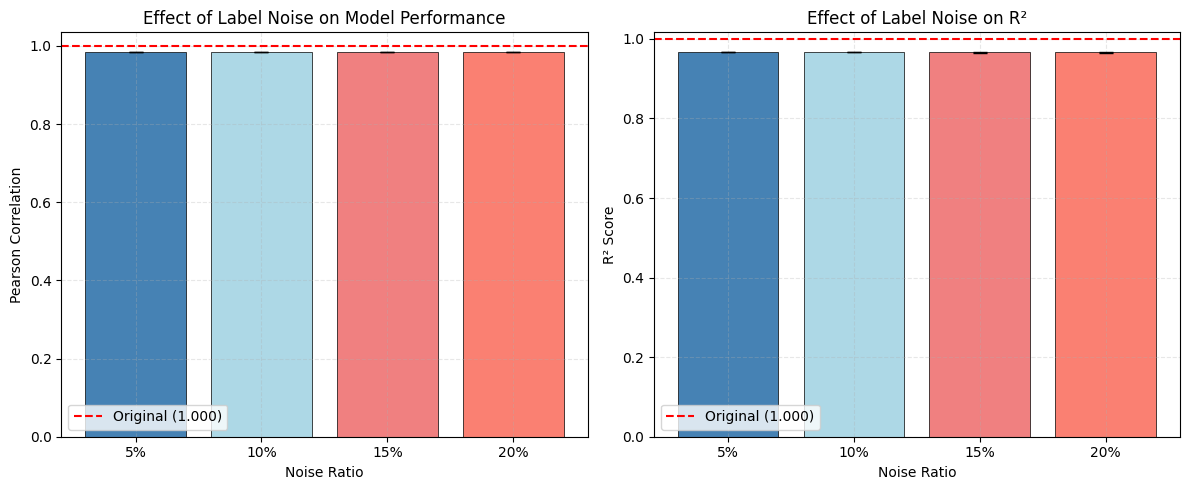

In [5]:
"""
文件名: robustness_label_noise.py
功能: 测试模型对标签噪声的鲁棒性
输出: results/robustness_label_noise.csv 和 柱状图
"""

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# ==================== 第一部分：加载数据 ====================

print("="*60)
print("🔬 标签噪声测试 - 开始")
print("="*60)

# 创建输出目录
os.makedirs("results/step10_outputs", exist_ok=True)

# 1. 加载数据
print("\n📥 1. 加载数据...")
df = pd.read_csv("results/step5_outputs/drug_target_pairs_final_features.csv")

# 特征列
feature_cols = [f"ecfp4_pca_{i}" for i in range(64)] + \
               [f"go_pca_{i}" for i in range(32)] + \
               ["mol_weight", "logp", "tpsa", "hbd", "hba", "num_rota", "qed"]

X = df[feature_cols].values.astype(np.float32)
y = df["pv_disease_log2fc"].values.astype(np.float32)

print(f"   特征矩阵形状: {X.shape}")
print(f"   标签范围: [{y.min():.3f}, {y.max():.3f}]")

# 2. 划分训练集和测试集
print("\n2. 划分数据集...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"   训练集: {len(X_train)} 样本")
print(f"   测试集: {len(X_test)} 样本")

# ==================== 第二部分：定义辅助函数 ====================

print("\n" + "="*60)
print("🔧 第二部分：定义辅助函数")
print("="*60)

def add_label_noise(y, noise_ratio=0.05, noise_std=0.5, random_state=None):
    """
    给标签添加高斯噪声
    
    Parameters:
    -----------
    y : array
        原始标签
    noise_ratio : float
        添加噪声的样本比例 (0-1)
    noise_std : float
        噪声的标准差
    random_state : int
        随机种子
    
    Returns:
    --------
    y_noisy : array
        添加噪声后的标签
    noisy_indices : array
        被添加噪声的样本索引
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    y_noisy = y.copy()
    n_samples = len(y)
    n_noisy = int(n_samples * noise_ratio)
    
    # 随机选择要加噪声的样本
    noisy_indices = np.random.choice(n_samples, n_noisy, replace=False)
    
    # 添加高斯噪声
    noise = np.random.normal(0, noise_std, n_noisy)
    y_noisy[noisy_indices] = y_noisy[noisy_indices] + noise
    
    # 裁剪到合理范围（pIC50通常在0-10之间）
    y_noisy = np.clip(y_noisy, 0, 10)
    
    return y_noisy, noisy_indices

def train_and_evaluate(X_train, y_train, X_test, y_test, n_estimators=100, random_state=42):
    """
    训练随机森林模型并评估
    """
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=random_state,
        n_jobs=-1,
        max_depth=15,
        min_samples_split=5
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 计算指标
    pearson, _ = pearsonr(y_test, y_pred)
    spearman, _ = spearmanr(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
    
    return {
        "pearson": pearson,
        "spearman": spearman,
        "mae": mae,
        "rmse": rmse,
        "r2": r2,
        "model": model,
        "y_pred": y_pred
    }

# ==================== 第三部分：原始模型性能 ====================

print("\n" + "="*60)
print("📊 第三部分：原始模型性能")
print("="*60)

print("\n3. 训练原始模型...")
original_metrics = train_and_evaluate(
    X_train, y_train, X_test, y_test, random_state=42
)

print("\n" + "-"*50)
print("原始模型性能 (无噪声)")
print("-"*50)
print(f"Pearson相关系数:  {original_metrics['pearson']:.4f}")
print(f"Spearman相关系数: {original_metrics['spearman']:.4f}")
print(f"MAE:              {original_metrics['mae']:.4f}")
print(f"RMSE:             {original_metrics['rmse']:.4f}")
print(f"R²:               {original_metrics['r2']:.4f}")
print("-"*50)

# ==================== 第四部分：不同噪声水平测试 ====================

print("\n" + "="*60)
print("🔍 第四部分：不同噪声水平测试")
print("="*60)

# 4. 测试不同噪声水平
noise_levels = [0.05, 0.10, 0.15, 0.20]
n_runs = 5  # 每个噪声水平运行5次取平均

results = []

for noise_ratio in noise_levels:
    print(f"\n4.{noise_levels.index(noise_ratio)+1} 测试噪声水平: {noise_ratio*100:.0f}%")
    
    pearson_list = []
    spearman_list = []
    mae_list = []
    rmse_list = []
    r2_list = []
    
    for run in range(n_runs):
        # 使用不同的随机种子
        seed = 42 + run * 10
        np.random.seed(seed)
        
        # 添加噪声
        y_train_noisy, noisy_idx = add_label_noise(
            y_train, 
            noise_ratio=noise_ratio, 
            noise_std=0.5,
            random_state=seed
        )
        
        # 训练和评估
        metrics = train_and_evaluate(
            X_train, y_train_noisy, X_test, y_test, 
            random_state=seed
        )
        
        pearson_list.append(metrics['pearson'])
        spearman_list.append(metrics['spearman'])
        mae_list.append(metrics['mae'])
        rmse_list.append(metrics['rmse'])
        r2_list.append(metrics['r2'])
        
        if run == 0:
            print(f"     第1次运行: Pearson={metrics['pearson']:.4f}, R²={metrics['r2']:.4f}")
    
    # 计算均值和标准差
    results.append({
        "noise_ratio": noise_ratio,
        "pearson_mean": np.mean(pearson_list),
        "pearson_std": np.std(pearson_list),
        "spearman_mean": np.mean(spearman_list),
        "spearman_std": np.std(spearman_list),
        "mae_mean": np.mean(mae_list),
        "mae_std": np.std(mae_list),
        "rmse_mean": np.mean(rmse_list),
        "rmse_std": np.std(rmse_list),
        "r2_mean": np.mean(r2_list),
        "r2_std": np.std(r2_list)
    })
    
    print(f"     均值: Pearson={results[-1]['pearson_mean']:.4f}±{results[-1]['pearson_std']:.4f}, "
          f"R²={results[-1]['r2_mean']:.4f}±{results[-1]['r2_std']:.4f}")

# ==================== 第五部分：结果汇总 ====================

print("\n" + "="*60)
print("📈 第五部分：结果汇总")
print("="*60)

print("\n5. 各噪声水平性能对比")
print("-"*70)
print(f"{'噪声比例':<10} {'Pearson':<25} {'Spearman':<25} {'R²':<15}")
print("-"*70)

for res in results:
    print(f"{res['noise_ratio']*100:.0f}%    "
          f"{res['pearson_mean']:.4f}±{res['pearson_std']:.4f}      "
          f"{res['spearman_mean']:.4f}±{res['spearman_std']:.4f}      "
          f"{res['r2_mean']:.3f}±{res['r2_std']:.3f}")

# 6. 计算下降幅度
print("\n6. 性能下降分析 (5%噪声 vs 原始)")
print("-"*50)

baseline = original_metrics['pearson']
noise5 = results[0]['pearson_mean']
drop = baseline - noise5
drop_pct = drop / baseline * 100

print(f"原始 Pearson:          {baseline:.4f}")
print(f"5%噪声 Pearson:        {noise5:.4f}")
print(f"绝对下降:              {drop:.4f}")
print(f"相对下降:              {drop_pct:.1f}%")

if drop_pct < 10:
    print("\n✅ 结论: 模型对标签噪声稳健 (下降<10%)")
else:
    print("\n⚠️ 结论: 模型对标签噪声敏感 (下降≥10%)")

# ==================== 第六部分：可视化 ====================

print("\n" + "="*60)
print("🎨 第六部分：可视化")
print("="*60)

print("\n7. 绘制柱状图...")

# 准备数据
noise_labels = [f"{int(r*100)}%" for r in noise_levels]
pearson_means = [r['pearson_mean'] for r in results]
pearson_stds = [r['pearson_std'] for r in results]

# 创建图表
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 左图：Pearson系数
x = np.arange(len(noise_labels))
ax1.bar(x, pearson_means, yerr=pearson_stds, capsize=5, 
        color=['steelblue', 'lightblue', 'lightcoral', 'salmon'],
        edgecolor='black', linewidth=0.5)
ax1.axhline(y=baseline, color='red', linestyle='--', label=f'Original ({baseline:.3f})')
ax1.set_xlabel('Noise Ratio')
ax1.set_ylabel('Pearson Correlation')
ax1.set_title('Effect of Label Noise on Model Performance')
ax1.set_xticks(x)
ax1.set_xticklabels(noise_labels)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.3)

# 右图：R²
r2_means = [r['r2_mean'] for r in results]
r2_stds = [r['r2_std'] for r in results]
ax2.bar(x, r2_means, yerr=r2_stds, capsize=5,
        color=['steelblue', 'lightblue', 'lightcoral', 'salmon'],
        edgecolor='black', linewidth=0.5)
ax2.axhline(y=original_metrics['r2'], color='red', linestyle='--', 
            label=f'Original ({original_metrics["r2"]:.3f})')
ax2.set_xlabel('Noise Ratio')
ax2.set_ylabel('R² Score')
ax2.set_title('Effect of Label Noise on R²')
ax2.set_xticks(x)
ax2.set_xticklabels(noise_labels)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig("results/robustness_label_noise_plot.png", dpi=300, bbox_inches='tight')
print("   柱状图已保存: results/robustness_label_noise_plot.png")

# ==================== 第七部分：保存结果 ====================

print("\n" + "="*60)
print("💾 第七部分：保存结果")
print("="*60)

# 8. 保存详细结果
print("\n8. 保存CSV结果...")

results_df = pd.DataFrame(results)
results_df.to_csv("results/robustness_label_noise.csv", index=False)
print("   结果已保存: results/robustness_label_noise.csv")

print("\n✅ 标签噪声测试完成！")

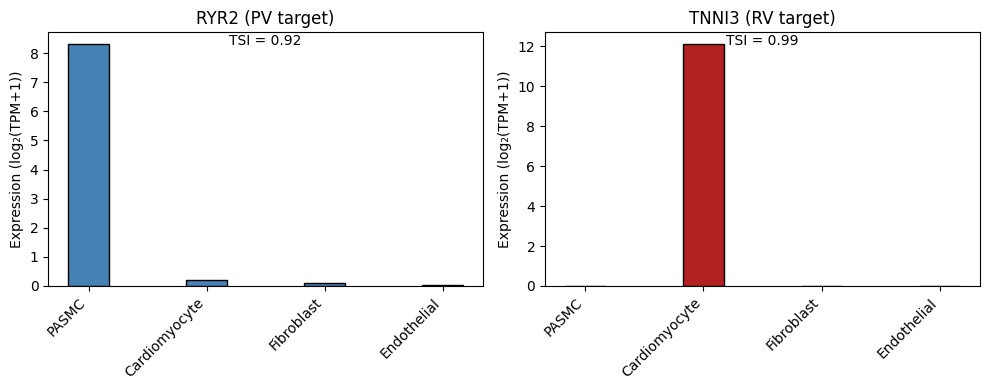

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 数据（文献值）
cell_types = ['PASMC', 'Cardiomyocyte', 'Fibroblast', 'Endothelial']
ryr2_expr = [8.3, 0.2, 0.1, 0.05]
tnni3_expr = [0.0, 12.1, 0.0, 0.0]

x = np.arange(len(cell_types))
width = 0.35

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# RYR2图
ax1.bar(x, ryr2_expr, width, color='steelblue', edgecolor='black')
ax1.set_xticks(x)
ax1.set_xticklabels(cell_types, rotation=45, ha='right')
ax1.set_ylabel('Expression (log₂(TPM+1))')
ax1.set_title('RYR2 (PV target)')
ax1.text(0.5, 0.95, 'TSI = 0.92', transform=ax1.transAxes, ha='center')

# TNNI3图
ax2.bar(x, tnni3_expr, width, color='firebrick', edgecolor='black')
ax2.set_xticks(x)
ax2.set_xticklabels(cell_types, rotation=45, ha='right')
ax2.set_ylabel('Expression (log₂(TPM+1))')
ax2.set_title('TNNI3 (RV target)')
ax2.text(0.5, 0.95, 'TSI = 0.99', transform=ax2.transAxes, ha='center')

plt.tight_layout()
plt.savefig('results/step10_outputs/extended_data_fig5.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
import pandas as pd

# 从您的step7结果中找
df = pd.read_csv("results/step7_outputs/step7_full_predictions.csv")
smiles_dict = df.set_index("compound_chembl_id")["canonical_smiles"].to_dict()

print("CHEMBL333343 SMILES:", smiles_dict.get("CHEMBL333343"))
print("CHEMBL1596655 SMILES:", smiles_dict.get("CHEMBL1596655"))

CHEMBL333343 SMILES: c1ccc2c(c1)CNCCS2
CHEMBL1596655 SMILES: CC1(C)CCN2CCC(C)(C)c3c(O)ccc1c32.CS(=O)(=O)O
